In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/passwordstrength1/data.csv", on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data.shape

(669640, 2)

In [4]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isnull().sum()

password    0
strength    0
dtype: int64

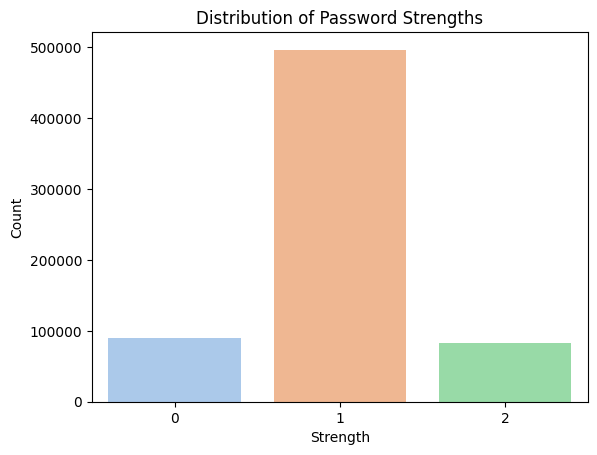

In [6]:
sns.countplot(x='strength', data=data, palette = 'pastel')
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Distribution of Password Strengths')
plt.show()

## Convert to tuple array

In [7]:
x = np.array(data["password"])
y = np.array(data["strength"])

### Defining a function to split input into list of individual characters

In [8]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

#### Using TF-IDF vectorizer to convert String data into numerical data

In [9]:
tdif = TfidfVectorizer(tokenizer=word)
X = tdif.fit_transform(x)

## Split data into train (80%) & test (20%).

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(535711, 153)

# Apply Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
model.score(X_test, y_test)

0.955961412102025

In [22]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 2, 1])

### Prediction for user input

In [23]:
usrpwd = "R1US!afx%@#834"
data = tdif.transform([usrpwd]).toarray()
pwd_strength = model.predict(data)

In [24]:
pwd_strength[0]

2

2 Means Password is Stong

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     17908
           1       0.96      0.99      0.97     99519
           2       0.96      0.91      0.93     16501

    accuracy                           0.96    133928
   macro avg       0.96      0.91      0.93    133928
weighted avg       0.96      0.96      0.96    133928



In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[14798  3105     5]
 [  635 98287   597]
 [   31  1525 14945]]
0.955961412102025


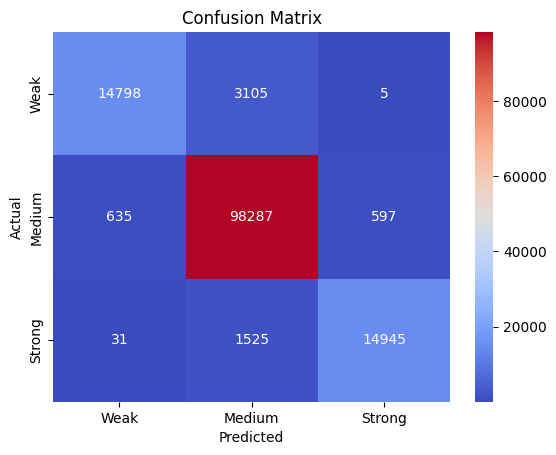

In [31]:
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
            xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()